In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the file to Python environment

In [4]:
data = pd.read_excel('/content/fish.xlsx')

In [5]:
data.head()

,Type,C1,C2,C3,C4,C5,C6
0,Bream,242.0,23.2,25.4,30.0,38.4,13.4
1,Bream,290.0,24.0,26.3,31.2,40.0,13.8
2,Bream,340.0,23.9,26.5,31.1,39.8,15.1
3,Bream,363.0,26.3,29.0,33.5,38.0,13.3
4,Bream,430.0,26.5,29.0,34.0,36.6,15.1


In [6]:
data.shape

(85, 7)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Type    85 non-null     object 
 1   C1      85 non-null     float64
 2   C2      85 non-null     float64
 3   C3      85 non-null     float64
 4   C4      85 non-null     float64
 5   C5      85 non-null     float64
 6   C6      85 non-null     float64
dtypes: float64(6), object(1)
memory usage: 4.8+ KB


In [8]:
data.describe()

,C1,C2,C3,C4,C5,C6
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,431.758824,27.338824,29.557647,33.120000,28.076471,12.865882
std,380.933962,11.289450,12.185045,13.197292,10.351543,2.117476
min,0.000000,9.300000,9.800000,10.800000,14.500000,8.700000
25%,120.000000,19.400000,21.000000,23.700000,16.900000,11.000000
50%,390.000000,28.400000,30.700000,35.000000,27.100000,13.700000
75%,650.000000,32.700000,36.000000,40.600000,39.200000,14.700000
max,1650.000000,59.000000,63.400000,68.000000,44.500000,16.100000


In [9]:
data['Type'].unique()

array(['Bream', 'Roach', 'Smelt', 'Pike'], dtype=object)

**Label Encoding**


In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
le=LabelEncoder()

In [12]:
data['Type'] = le.fit_transform(data['Type'])

In [13]:
data.head()

,Type,C1,C2,C3,C4,C5,C6
0,0,242.0,23.2,25.4,30.0,38.4,13.4
1,0,290.0,24.0,26.3,31.2,40.0,13.8
2,0,340.0,23.9,26.5,31.1,39.8,15.1
3,0,363.0,26.3,29.0,33.5,38.0,13.3
4,0,430.0,26.5,29.0,34.0,36.6,15.1


In [14]:
data['Type'].unique()

array([0, 2, 3, 1])

<Axes: >

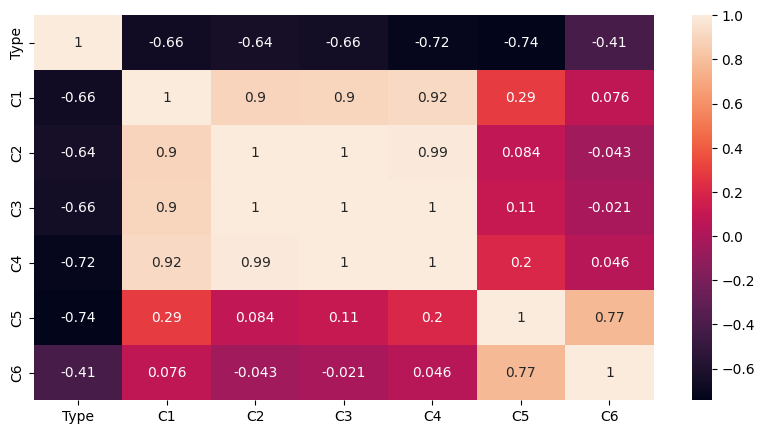

In [40]:

coormatrix = data.corr()
plt.subplots(figsize=(10,5))
sns.heatmap(coormatrix,annot =True)

## K-Mean

In [15]:
X = data[['Type','C1','C2','C3','C4','C5','C6']]

In [16]:
from sklearn.cluster import KMeans

In [17]:
wcss=[]
for i in range(1,11):
  km = KMeans(n_clusters = i,n_init = 20)
  km.fit(X)
  css =   km.inertia_
  print('Clusters = ',i,"wcss=",css)
  wcss.append(css)

Clusters =  1 wcss= 12236590.729411764
Clusters =  2 wcss= 4419944.259642857
Clusters =  3 wcss= 1923730.8907390642
Clusters =  4 wcss= 907312.1363535353
Clusters =  5 wcss= 525850.290763889
Clusters =  6 wcss= 334270.01886846405
Clusters =  7 wcss= 224426.1479761905
Clusters =  8 wcss= 138394.8515873016
Clusters =  9 wcss= 97976.37856349208
Clusters =  10 wcss= 78977.43827380953


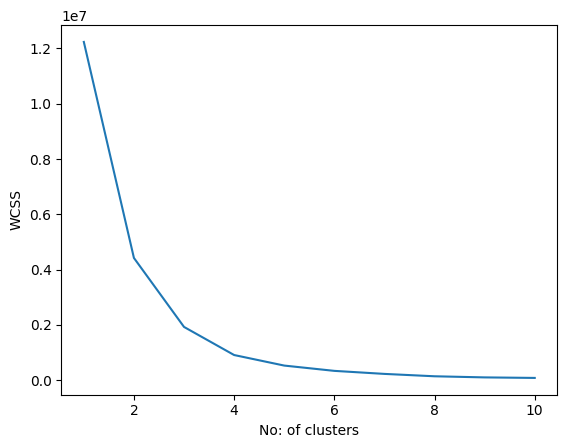

In [18]:
plt.plot(range(1,11),wcss)
plt.xlabel("No: of clusters")
plt.ylabel("WCSS")
plt.show()

In [19]:
km = KMeans(n_clusters = 4,n_init = 20)

In [20]:
km.fit(X)

KMeans(n_clusters=4, n_init=20)

In [21]:
cluster_labels=km.predict(X)

In [22]:
cluster_labels

array([3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1, 1, 1],
      dtype=int32)

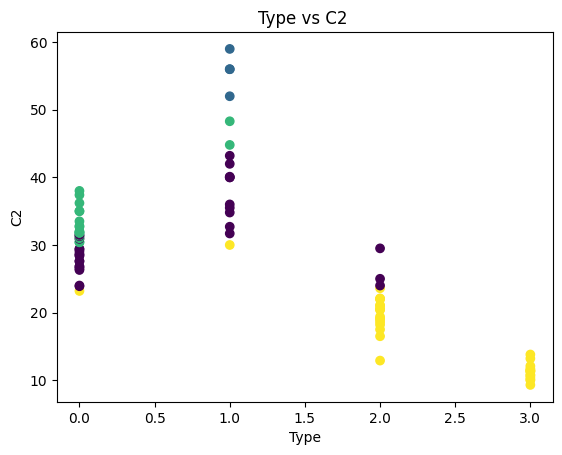

In [24]:
plt.scatter(X['Type'],X['C2'],c=cluster_labels)
plt.xlabel('Type')
plt.ylabel('C2')
plt.title('Type vs C2 ')
plt.show()

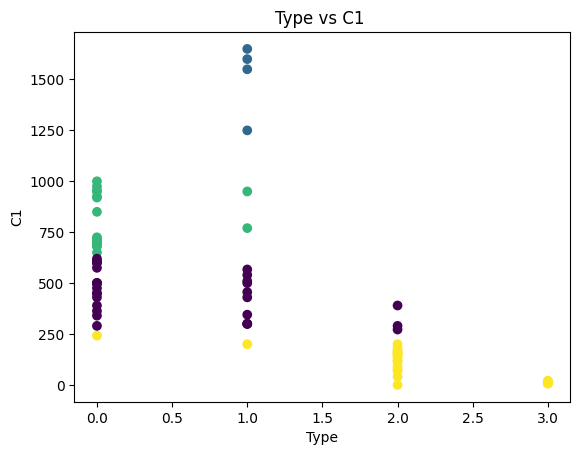

In [25]:
plt.scatter(X['Type'],X['C1'],c=cluster_labels)
plt.xlabel('Type')
plt.ylabel('C1')
plt.title('Type vs C1 ')
plt.show()

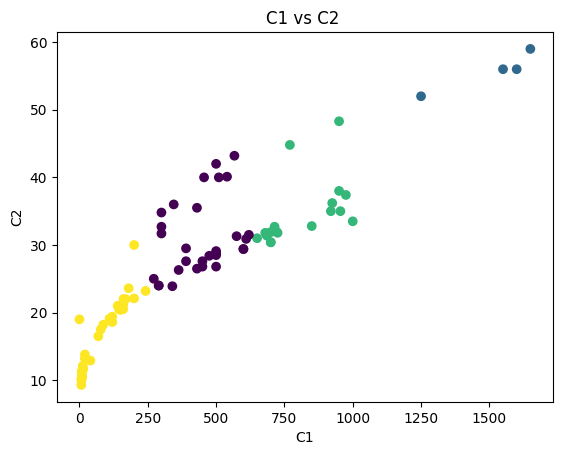

In [26]:
plt.scatter(X['C1'],X['C2'],c=cluster_labels)
plt.xlabel('C1')
plt.ylabel('C2')
plt.title('C1 vs C2 ')
plt.show()

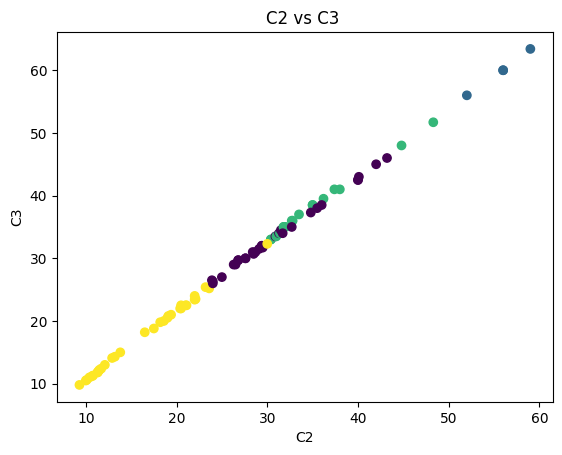

In [35]:
plt.scatter(X['C2'],X['C3'],c=cluster_labels)
plt.xlabel('C2')
plt.ylabel('C3')
plt.title('C2 vs C3 ')
plt.show()

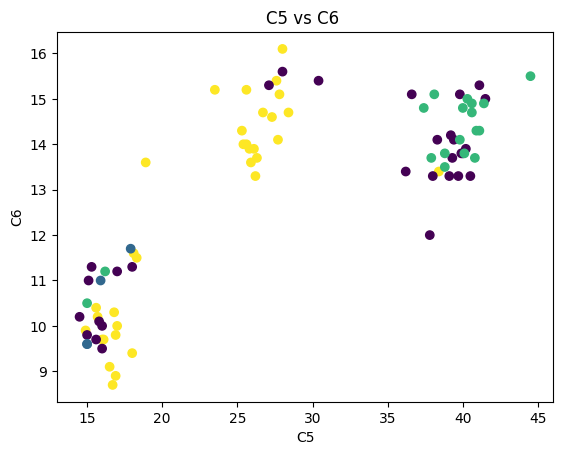

In [41]:
plt.scatter(X['C5'],X['C6'],c=cluster_labels)
plt.xlabel('C5')
plt.ylabel('C6')
plt.title('C5 vs C6 ')
plt.show()

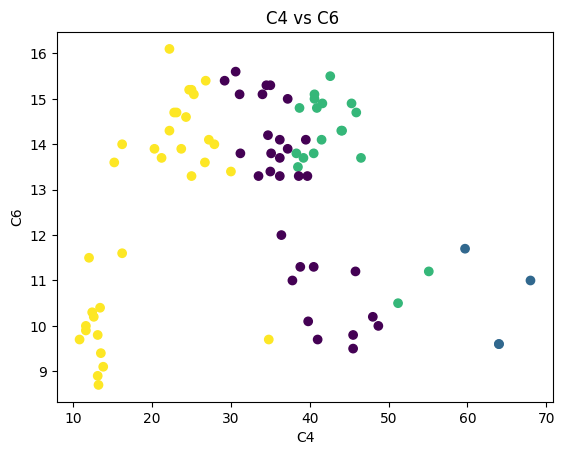

In [42]:
plt.scatter(X['C4'],X['C6'],c=cluster_labels)
plt.xlabel('C4')
plt.ylabel('C6')
plt.title('C4 vs C6 ')
plt.show()